In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv("pima-indians-diabetes.csv")

X = data.iloc[:, :-1]
Y = data.iloc[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #allocated 20% of our data for testing
print(X)
print(Y)
model = DecisionTreeClassifier ()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

score = accuracy_score(Y_test, predictions)
score


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


0.7467532467532467

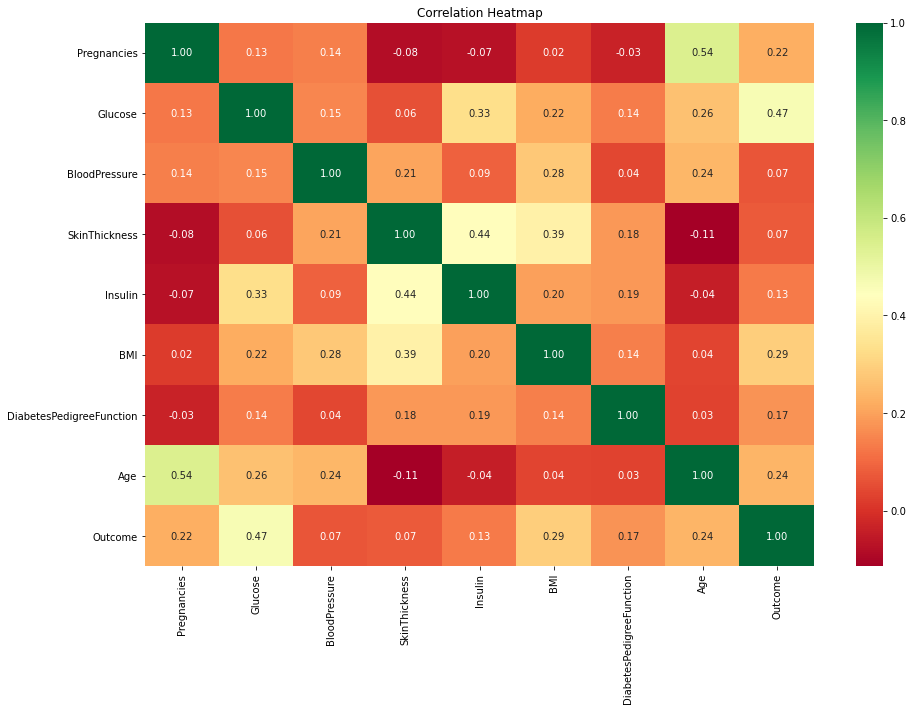

In [40]:
# Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
# Change the diabetes column data from boolean to number
diabetes_map = {1: 1, 0: 0}  # Assuming 1 represents True and 0 represents False
data['Outcome'] = data['Outcome'].map(diabetes_map)

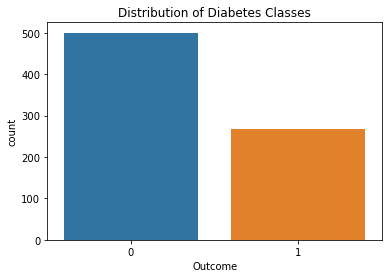

In [42]:
# Visualize the distribution of diabetes classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Diabetes Classes")
plt.show()

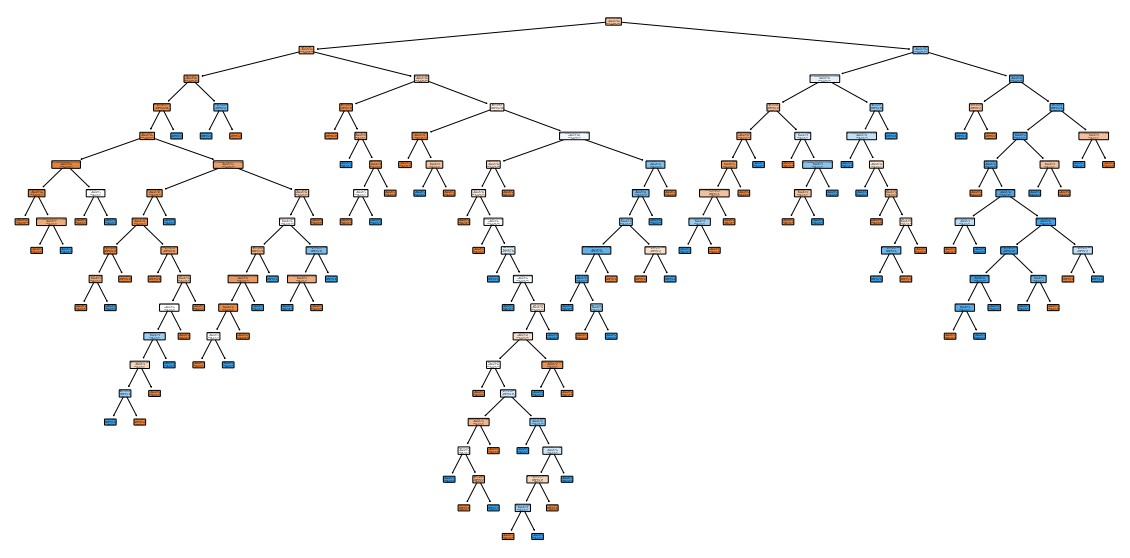

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#data loading and preprocessing
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Outcome']
X = data[feature_columns].values
y = data[predicted_class].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Use SimpleImputer to fill missing values
fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# Create and fit the DecisionTreeClassifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [45]:
from sklearn import metrics
predict_train_data = model.predict(X_test)
#Evaluate the model
accuracy = metrics.accuracy_score(y_test, predict_train_data)
print("Decision Tree Model Accuracy: {:.3f}".format(accuracy))

Decision Tree Model Accuracy: 0.701


In [46]:
import tkinter as tk
import numpy as np
from sklearn.preprocessing import StandardScaler
feature_columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]
scaler = StandardScaler()
training_data = pd.DataFrame(data)
scaler.fit(training_data[feature_columns])
window = tk.Tk()
window.title("Decision Tree Predictor")

questions = [
    "Number of times pregnant:",
    "Plasma glucose concentration:",
    "Diastolic blood pressure (mm Hg):",
    "Triceps skin fold thickness (mm):",
    "2-Hour serum insulin (mu U/ml):",
    "Body mass index (weight in kg/(height in m)^2):",
    "Diabetes pedigree function:",
    "Age (years):",
]

input_fields = []

for i in range(8):
    label = tk.Label(window, text=questions[i])
    label.pack()

 # Create the input field
    input_field = tk.Entry(window)
    input_field.pack()
    input_fields.append(input_field)

def predict():
    input_values = [input_field.get() for input_field in input_fields]
    input_data = pd.DataFrame([input_values], columns=feature_columns)
    input_data = scaler.transform(input_data)
    predictions = model.predict(input_data)
    def diagnostic_test(x):
        return x

    test_results = [diagnostic_test(x) for x in predictions]
    if test_results == [0]:
        output_label.configure(text="Person does not have diabetes.")
    elif test_results == [1]:
        output_label.configure(text="Person has diabetes.")
    else:
        output_label.configure(text="NULL")

predict_button = tk.Button(window, text="Predict", command=predict)
predict_button.pack()

output_label = tk.Label(window, text="")
output_label.pack()

window.mainloop()